### Keywords 

https://scikit-learn.org/stable/modules/tree.html

- The links between nodes are called branches or paths
- entrophy : uncertainity #read ->https://arxiv.org/pdf/1405.2061.pdf
- Firstly there is a randomness to their generation, which can lead to variance in estimates.
- they are biased towards the dominant class, so balanced data is needed.


In [3]:
import pandas as pd
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

In [4]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

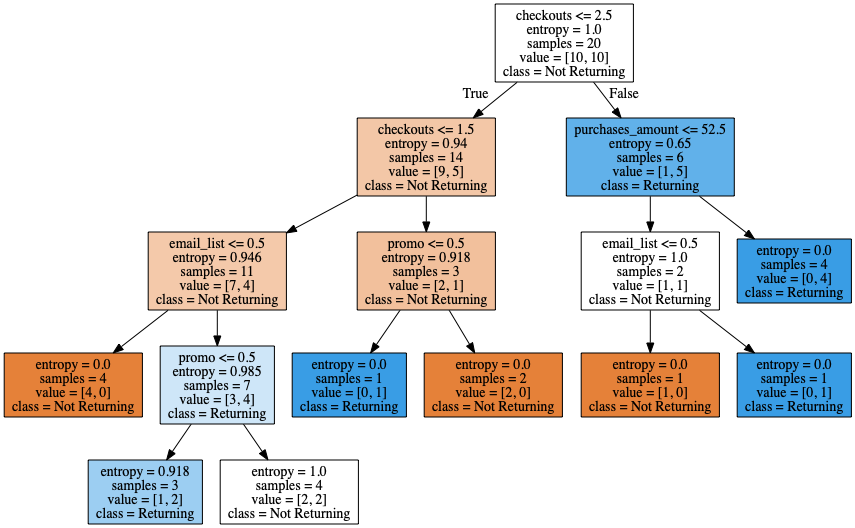

In [5]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Pseudocoding the Algorithm

Algorithm(Observations, Outcome, Attributes)
   - Create a root node.
   - If all observations are 'A', label root node 'A' and return.
   - If all observations are 'B', label root node 'B' and return.
   - If no attributes return the root note labeled with the most common Outcome.
   - Otherwise, start:
   -    For each value vi of each attribute ai, calculate the entropy.
   -     The attribute ai and value vi with the lowest entropy is the best rule.
   -     The attribute for this node is then ai
   -         Split the tree to below based on the rule ai = vi
   -         Observationsvi is the subset of observations with value vi
   -         If Observationsvi is empty cap with node labeled with most common Outcome
   -         Else at the new node start a subtree (Observationsvi, Target Outcome, Attributes - {ai}) and repeat the algorithm

In [ ]:
# Real Algorithm

import math

#find item in a list
def find(item, list):
    for i in list:
        if item(i): 
            return True
        else:
            return False

#find most common value for an attribute
def majority(attributes, data, target):
    #find target attribute
    valFreq = {}
    #find target in data
    index = attributes.index(target)
    #calculate frequency of values in target attr
    for tuple in data:
        if (valFreq.has_key(tuple[index])):
            valFreq[tuple[index]] += 1 
        else:
            valFreq[tuple[index]] = 1
    max = 0
    major = ""
    for key in valFreq.keys():
        if valFreq[key]>max:
            max = valFreq[key]
            major = key
    return major

#Calculates the entropy of the given data set for the target attr
def entropy(attributes, data, targetAttr):

    valFreq = {}
    dataEntropy = 0.0
    
    #find index of the target attribute
    i = 0
    for entry in attributes:
        if (targetAttr == entry):
            break
        ++i
    
    # Calculate the frequency of each of the values in the target attr
    for entry in data:
        if (valFreq.has_key(entry[i])):
            valFreq[entry[i]] += 1.0
        else:
            valFreq[entry[i]]  = 1.0

    # Calculate the entropy of the data for the target attr
    for freq in valFreq.values():
        dataEntropy += (-freq/len(data)) * math.log(freq/len(data), 2) 
        
    return dataEntropy

def gain(attributes, data, attr, targetAttr):
    """
    Calculates the information gain (reduction in entropy) that would
    result by splitting the data on the chosen attribute (attr).
    """
    valFreq = {}
    subsetEntropy = 0.0
    
    #find index of the attribute
    i = attributes.index(attr)

    # Calculate the frequency of each of the values in the target attribute
    for entry in data:
        if (valFreq.has_key(entry[i])):
            valFreq[entry[i]] += 1.0
        else:
            valFreq[entry[i]]  = 1.0
    # Calculate the sum of the entropy for each subset of records weighted
    # by their probability of occuring in the training set.
    for val in valFreq.keys():
        valProb        = valFreq[val] / sum(valFreq.values())
        dataSubset     = [entry for entry in data if entry[i] == val]
        subsetEntropy += valProb * entropy(attributes, dataSubset, targetAttr)

    # Subtract the entropy of the chosen attribute from the entropy of the
    # whole data set with respect to the target attribute (and return it)
    return (entropy(attributes, data, targetAttr) - subsetEntropy)

#choose best attibute 
def chooseAttr(data, attributes, target):
    best = attributes[0]
    maxGain = 0;
    for attr in attributes:
        newGain = gain(attributes, data, attr, target) 
        if newGain>maxGain:
            maxGain = newGain
            best = attr
    return best

#get values in the column of the given attribute 
def getValues(data, attributes, attr):
    index = attributes.index(attr)
    values = []
    for entry in data:
        if entry[index] not in values:
            values.append(entry[index])
    return values

def getExamples(data, attributes, best, val):
    examples = [[]]
    index = attributes.index(best)
    for entry in data:
        #find entries with the give value
        if (entry[index] == val):
            newEntry = []
            #add value if it is not in best column
            for i in range(0,len(entry)):
                if(i != index):
                    newEntry.append(entry[i])
            examples.append(newEntry)
    examples.remove([])
    return examples

def makeTree(data, attributes, target, recursion):
    recursion += 1
    #Returns a new decision tree based on the examples given.
    data = data[:]
    vals = [record[attributes.index(target)] for record in data]
    default = majority(attributes, data, target)

    # If the dataset is empty or the attributes list is empty, return the
    # default value. When checking the attributes list for emptiness, we
    # need to subtract 1 to account for the target attribute.
    if not data or (len(attributes) - 1) <= 0:
        return default
    # If all the records in the dataset have the same classification,
    # return that classification.
    elif vals.count(vals[0]) == len(vals):
        return vals[0]
    else:
        # Choose the next best attribute to best classify our data
        best = chooseAttr(data, attributes, target)
        # Create a new decision tree/node with the best attribute and an empty
        # dictionary object--we'll fill that up next.
        tree = {best:{}}
    
        # Create a new decision tree/sub-node for each of the values in the
        # best attribute field
        for val in getValues(data, attributes, best):
            # Create a subtree for the current value under the "best" field
            examples = getExamples(data, attributes, best, val)
            newAttr = attributes[:]
            newAttr.remove(best)
            subtree = makeTree(examples, newAttr, target, recursion)
    
            # Add the new subtree to the empty dictionary object in our new
            # tree/node we just created.
            tree[best][val] = subtree